In [1]:
import matplotlib.pyplot as plt
import random
from typing import List
import math
import numpy as np

# Utils

In [2]:
def compute_accuracy_metric(model, all_samples_inputs, all_samples_expected_outputs, is_binary):
  valid_predictions = 0
  for k in range(len(all_samples_inputs)):
    predicted_value = model.predict(all_samples_inputs[k], True)
    if is_binary and predicted_value[0] * all_samples_expected_outputs[k][0] >= 0:
      valid_predictions += 1
    elif not is_binary and np.argmax(predicted_value) == np.argmax(all_samples_expected_outputs[k]):      
      valid_predictions += 1
  
  return valid_predictions / len(all_samples_inputs)
      

# Definition Structure PMC

In [3]:
class MyMLP:
  def __init__(self, npl: List[int]):
    self.d = list(npl)
    self.L = len(npl) - 1
    self.W = [] # self.W[l][i][j]

    self.X = [] # self.X[l][j]
    self.deltas = [] # self.X[l][j]

    for l in range(len(npl)):
      self.W.append([])

      if l == 0:
        continue

      for i in range(self.d[l - 1] + 1):
        self.W[l].append([])

        for j in range(self.d[l] + 1):
          self.W[l][i].append(0.0 if j == 0.0 else (random.random() * 2.0) - 1.0)

    for l in range(len(npl)):
      self.X.append([])
      self.deltas.append([])

      for j in range(self.d[l] + 1):
        self.X[l].append(1.0 if j == 0.0 else 0.0)
        self.deltas[l].append(0.0)

  def predict(self, inputs: List[float], is_classification: bool) -> List[float]:
    assert(len(inputs) == self.d[0])
    
    for j, v in enumerate(inputs):
      self.X[0][j + 1] = v

    for l in range(1, len(self.d)):
      for j in range(1, self.d[l] + 1):
        total = 0.0
        for i in range(0, self.d[l - 1] + 1):
          total += self.W[l][i][j] * self.X[l - 1][i]
        
        if l != self.L or is_classification:
          total = math.tanh(total)
        self.X[l][j] = total
    
    return self.X[self.L][1:]

  def train(self, 
            all_samples_inputs: List[List[float]], 
            all_samples_expected_outputs: List[List[float]],
            learning_rate: float, # alpha
            nb_iter: int,
            is_classification: bool
            ):
    assert(len(all_samples_inputs) == len(all_samples_expected_outputs))
    
    
    for it in range(nb_iter):
      k = random.randint(0, len(all_samples_inputs) - 1)
      sample_inputs = all_samples_inputs[k]
      sample_expected_outputs = all_samples_expected_outputs[k]

      _ = self.predict(sample_inputs, is_classification)

      for j in range(1, self.d[self.L] + 1):
        self.deltas[self.L][j] = self.X[self.L][j] - sample_expected_outputs[j - 1]
        if is_classification:
          self.deltas[self.L][j] *= 1 - self.X[self.L][j] ** 2
      
      for l in reversed(range(1, len(self.d))):
        for i in range(1, self.d[l - 1] + 1):
            total = 0.0
            for j in range(1, self.d[l] + 1):
              total += self.W[l][i][j] * self.deltas[l][j]
            total *= 1 - self.X[l-1][i] ** 2
            self.deltas[l - 1][i] = total
        
      for l in range(1, len(self.d)):
        for i in range(self.d[l - 1] + 1):
          for j in range(1, self.d[l] + 1):
            self.W[l][i][j] -= learning_rate * self.X[l-1][i] * self.deltas[l][j]


# Test Sans couche cachée

In [4]:
points = [
          [0, 0],
          [0, 1],
          [1, 0],
]

In [5]:
XOnes = [p[0] for p in points]
XTwos = [p[1] for p in points]

In [6]:
Y = [
     [-1],
     [1],
     [1],
]

In [7]:
colors= ['blue' if y[0] == 1 else 'red' for y in Y]

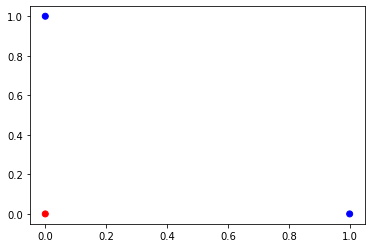

In [8]:
plt.scatter(XOnes, XTwos, c=colors)

## Création du Modele

In [9]:
model = MyMLP([2, 1])

## Avant entrainement

In [10]:
for p in points:
  print(model.predict(p, True))

[0.665276986996937]
[0.9107002815997399]
[0.5898494297499051]


In [11]:
compute_accuracy_metric(model, points, Y, True)

0.6666666666666666

## Entrainement

In [12]:
model.train(points, Y, 0.01, 100000, True)

## Après Entrainement

In [13]:
for p in points:
  print(model.predict(p, True))

[-0.9549807358778833]
[0.9715389225169531]
[0.9714601216689666]


In [14]:
compute_accuracy_metric(model, points, Y, True)

1.0

# Test sur le XOR

In [15]:
points = [
          [0, 0],
          [0, 1],
          [1, 0],
          [1, 1],
]

In [16]:
XOnes = [p[0] for p in points]
XTwos = [p[1] for p in points]

In [17]:
Y = [
     [-1],
     [1],
     [1],
     [-1],
]

In [18]:
colors= ['blue' if y[0] == 1 else 'red' for y in Y]

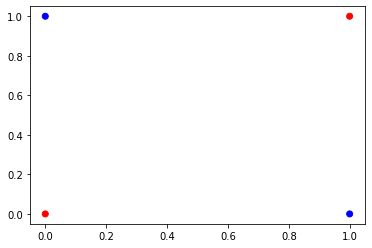

In [19]:
plt.scatter(XOnes, XTwos, c=colors)

## Création du modèle

In [20]:
model = MyMLP([2, 3, 1])

## Avant Entrainement

In [21]:
for p in points:
  print(model.predict(p, True))

[0.06352560709270447]
[-0.1649892935598862]
[0.17579025314766086]
[-0.00891088307234429]


In [22]:
compute_accuracy_metric(model, points, Y, True)

0.5

## Entrainement

In [23]:
model.train(points, Y, 0.01, 100000, True)

## Après entrainement

In [24]:
for p in points:
  print(model.predict(p, True))

[-0.9783260174680233]
[0.9798619854828646]
[0.9796945268827298]
[-0.9746402653047297]


In [25]:
compute_accuracy_metric(model, points, Y, True)

1.0

In [26]:
validation_points = [[[i/100.0, j/100.0] for i in range(0, 100)]for j in range(0, 100)]

In [27]:
XOnes = [p[0] for lp in validation_points for p in lp]
XTwos = [p[1] for lp in validation_points for p in lp]

In [28]:
colors= ['blue' if model.predict(p, True)[0] >= 0 else 'red' for lp in validation_points for p in lp]

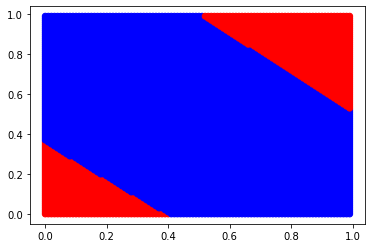

In [29]:
plt.scatter(XOnes, XTwos, c=colors)

In [30]:
colors= [
         (1 - (model.predict(p, True)[0] + 1) / 2, 0, (model.predict(p, True)[0] + 1) / 2)
         for lp in validation_points for p in lp]

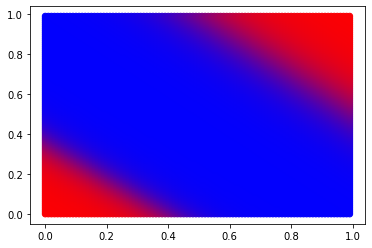

In [31]:
plt.scatter(XOnes, XTwos, c=colors)

# Test régression avec PMC

In [32]:
points = [
          [0, 0],
          [0, 1],
          [1, 0],
]

In [33]:
XOnes = [p[0] for p in points]
XTwos = [p[1] for p in points]

In [34]:
Y = [
     [42],
     [13],
     [-18],
]

## Création du Modele

In [35]:
model = MyMLP([2, 1])

## Avant entrainement

In [36]:
for p in points:
  print(model.predict(p, False))

[0.8032763304882442]
[1.5787148535844353]
[0.41181206763711087]


## Entrainement

In [37]:
model.train(points, Y, 0.01, 100000, False)

## Après Entrainement

In [38]:
for p in points:
  print(model.predict(p, False))

[41.999999999999645]
[13.000000000000178]
[-17.999999999999645]
